# Data Scientist Salary Analysis

In [1]:
pip install matplotlib seaborn sklearn

Note: you may need to restart the kernel to use updated packages.


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from ipywidgets import (widgets, interact, interactive, interact_manual, fixed)
from scipy.stats import chi2_contingency
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing, metrics, tree, svm
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

pd.set_option('display.max_colwidth', None) # to see all the contents of a cell
pd.set_option('display.max_columns', None)  

In [4]:
data = pd.read_csv('train.csv')
data.head()

,Unnamed: 0,experience,job_description,job_desig,job_type,key_skills,location,salary,company_name_encoded
0,0,5-7 yrs,Exp: Minimum 5 years;Good understanding of IOC rules; Must Have:;Good analytical skills;Good ...,Senior Exploit and Vulnerability Researcher,NaN,"team skills, communication skills, analytical skills, problem solving...",Delhi NCR(Vikas Puri),6to10,3687
1,1,10-17 yrs,He should have handled a team of atleast 5-6 direct reportees;mechanical or Diploma (mechanical) with at ...,Head SCM,NaN,"ppc, logistics, inventory management, supply chain management, procurement,...",Sonepat,10to15,458
2,2,5-9 yrs,Must be an effective communicator (written & spoken) and strong in inter personal relationship & ...,Deputy Manager - Talent Management & Leadership Development - Auto,Analytics,"HR Analytics, Employee Engagement, Training, Succession Planning...",Delhi NCR,15to25,4195
3,3,7-10 yrs,7 - 10 years of overall experience in data engineering and Big Data systems;Proficient understanding ...,Associate Manager Data Engineering,Analytics,"SQL, Javascript, Automation, Python, Ruby, Analytics, Machine learning...",Bengaluru,10to15,313
4,4,1-3 yrs,Chartered Accountancy degree or MBA in Finance from a premier institute with 1-3 years of experience in ...,TS- GSA- Senior Analyst,NaN,"accounting, finance, cash flow, financial planning, statutory accounting",Gurgaon,3to6,1305


### Exploratory Data Analysis

In [5]:
# Dropping the index column

data1 = data.iloc[:, 1:]
data1.head()

,experience,job_description,job_desig,job_type,key_skills,location,salary,company_name_encoded
0,5-7 yrs,Exp: Minimum 5 years;Good understanding of IOC rules; Must Have:;Good analytical skills;Good ...,Senior Exploit and Vulnerability Researcher,NaN,"team skills, communication skills, analytical skills, problem solving...",Delhi NCR(Vikas Puri),6to10,3687
1,10-17 yrs,He should have handled a team of atleast 5-6 direct reportees;mechanical or Diploma (mechanical) with at ...,Head SCM,NaN,"ppc, logistics, inventory management, supply chain management, procurement,...",Sonepat,10to15,458
2,5-9 yrs,Must be an effective communicator (written & spoken) and strong in inter personal relationship & ...,Deputy Manager - Talent Management & Leadership Development - Auto,Analytics,"HR Analytics, Employee Engagement, Training, Succession Planning...",Delhi NCR,15to25,4195
3,7-10 yrs,7 - 10 years of overall experience in data engineering and Big Data systems;Proficient understanding ...,Associate Manager Data Engineering,Analytics,"SQL, Javascript, Automation, Python, Ruby, Analytics, Machine learning...",Bengaluru,10to15,313
4,1-3 yrs,Chartered Accountancy degree or MBA in Finance from a premier institute with 1-3 years of experience in ...,TS- GSA- Senior Analyst,NaN,"accounting, finance, cash flow, financial planning, statutory accounting",Gurgaon,3to6,1305


**How many records are there?**

In [6]:
print("There are {} records in the training df.". format(len(data1)))

There are 19802 records in the training df.


In [7]:
for i in data1.columns:
    print(data1[i].value_counts(dropna = False))
    print("_________________________________________________")

5-10 yrs     1274
2-5 yrs      1188
3-8 yrs       922
2-7 yrs       832
4-9 yrs       678
             ... 
17-25 yrs       1
14-19 yrs       1
4-4 yrs         1
16-18 yrs       1
11-12 yrs       1
Name: experience, Length: 129, dtype: int64
_________________________________________________
NaN                                                                                                             4418
Accenture Technology powers our clients businesses with innovative technologies established and emerging ...     144
- Experience in Credit card/ banking domain with knowledge across customer lifecycle is must;- Candidate ...      46
- Experience in defining and executing professional software engineering best practices for the full ...          33
- Team management / mentor ship experience is must; Should be good at resolving conflicts;- Experience ...        32
                                                                                                                ... 
-     

**Are there any duplicates?** 

In [8]:
# Filling in the null values with 'missing'
data1.loc[:, 'job_description'] = data1.loc[:, 'job_description'].fillna('missing')
data1.loc[:, 'key_skills'] = data1.loc[:, 'key_skills'].fillna('missing')

data1a = data1.drop_duplicates().copy()
print(len(data1))
print(len(data1a)) # there are duplicates, we dropped them

19802
18406


**How many job designations are there?**

In [9]:
print("There are {} unique job designations in the training df." .format(len(data1a['job_desig'].value_counts(dropna =  False))))

There are 11708 unique job designations in the training df.


**Top 10 most popular job designations**

In [10]:
top10_desig = pd.DataFrame(data1a['job_desig'].value_counts(dropna = False).head(10)).reset_index().rename(columns = {'index': 'Job Designation', 'job_desig': 'Count'})
top10_desig

,Job Designation,Count
0,Business Analyst,137
1,Data Scientist,80
2,Data Analyst,64
3,Product Manager,60
4,Home Base Job/ Data Entry/online Work/part Time Work/freelancer work,53
5,Digital Marketing Manager,51
6,Digital Marketing Executive,41
7,Analyst,38
8,Microsoft Advanced Analytics,32
9,SEO Executive,31


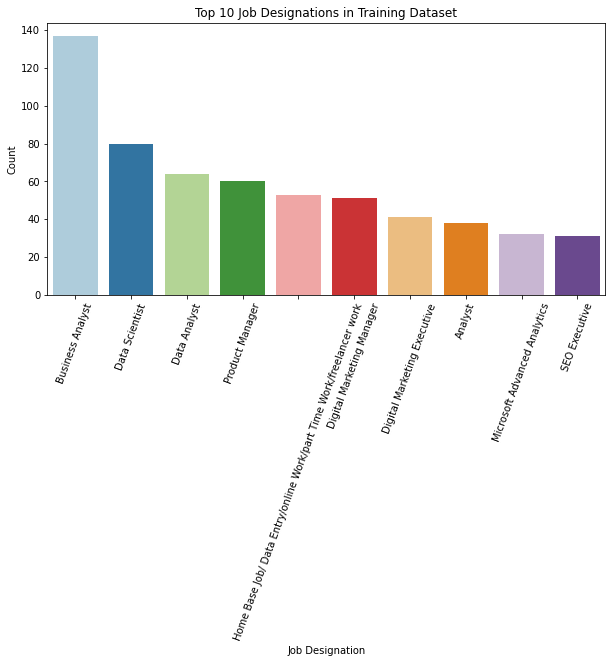

In [11]:
plt.figure(figsize=(10, 5))
pal = sns.color_palette('Paired')
sns.barplot(x = 'Job Designation', y = 'Count', palette = pal, data = top10_desig).set_title("Top 10 Job Designations in Training Dataset")
plt.xticks(rotation=70)
plt.show()

**What are the 10 most common locations in the df?**

In [12]:
top10_loc = pd.DataFrame(data1a['location'].value_counts(dropna = False).head(10)).reset_index().rename(columns = {'index': 'Location', 'location': 'Count'})
top10_loc

,Location,Count
0,Bengaluru,3881
1,Mumbai,2281
2,Gurgaon,1524
3,Pune,1094
4,Hyderabad,1009
5,Chennai,916
6,Delhi NCR,661
7,Noida,495
8,"Delhi NCR, Gurgaon",285
9,Delhi,241


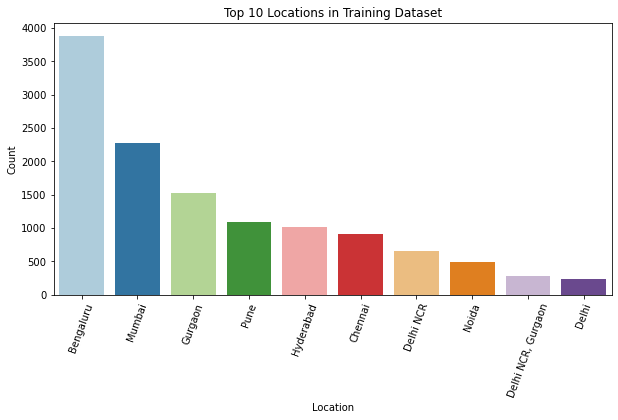

In [13]:
plt.figure(figsize=(10,5))
pal = sns.color_palette('Paired')
sns.barplot(x = 'Location', y = 'Count', palette = pal, data = top10_loc).set_title("Top 10 Locations in Training Dataset")
plt.xticks(rotation=70)
plt.show()

**Is job designation correlated with salary?**

In [14]:
data1a.groupby('job_desig')['salary'].value_counts(dropna = False)

job_desig                                                             salary
. Net Developer - ASP / Entity Framework                              10to15    1
. Net Developer - Asp/c#/mvc                                          10to15    1
                                                                      6to10     1
.3D Project Manager                                                   10to15    1
.NET Dev - Night Shift: Permanent Position: Hamran Coimbatore         6to10     1
                                                                               ..
we are Looking for Python and Pyspark_c2h_mnc__bangalore              0to3      1
we are Looking for Splunk Developer  _mnc_c2h_anz, Bangalore Captive  0to3      1
we have job Opportunity as Costing Engineer                           10to15    1
yardi functional consultant                                           6to10     1
yardi report developer                                                6to10     2
Name: salary, Length:

In [15]:
# Cleaning up the job designation column
to_drop = ['we', 'are', 'Looking', 'for', 'have', 'job', 'Opportunity', 'as', 'Wanted', 'Hiring'] # list of words we want to drop
f = lambda x: ' '.join([item for item in x.split() if item not in to_drop]) # function to drop words from list above using lambda
data1a.loc[:, 'job_desig_cleaned'] = data1a.loc[:, 'job_desig'].apply(f) # applying the function

In [16]:
# Recoding salary so that we can compute chi-square test later on
salary_order = {"0to3": 1, "3to6": 2, "6to10": 3, "10to15": 4, "15to25": 5, "25to50": 6}

data1a.loc[:, 'salary_num'] = data1a.loc[:, 'salary'].map(salary_order)
data1a.groupby('salary_num')['salary'].value_counts(dropna = False)

salary_num  salary
1           0to3      3210
2           3to6      2516
3           6to10     3533
4           10to15    4340
5           15to25    3573
6           25to50    1234
Name: salary, dtype: int64

In [17]:
data1a['job_desig_cleaned'].value_counts(dropna = False).head(30)

Business Analyst                                                        139
Data Scientist                                                           80
Data Analyst                                                             65
Product Manager                                                          60
Home Base Job/ Data Entry/online Work/part Time Work/freelancer work     53
Digital Marketing Manager                                                52
Digital Marketing Executive                                              41
Analyst                                                                  38
Microsoft Advanced Analytics                                             32
SEO Executive                                                            31
Associate                                                                28
Application Developer                                                    27
SEO Analyst                                                              26
Senior Softw

In [18]:
# Looking at job designations with "Analyst" in the title, creating a flag
data1a[data1a['job_desig_cleaned'].str.contains('Analyst', case = False)]['job_desig_cleaned'].value_counts(dropna = False)

Business Analyst                                                      139
Data Analyst                                                           65
Analyst                                                                38
SEO Analyst                                                            26
Quality Analyst                                                        23
                                                                     ... 
Medical Transcriptionist / Quality Analyst (medical Transcription)      1
Quality Analyst - Domestic Sales/ Collections Process                   1
Client Analyst / Business Analyst                                       1
Urgent Opening For Quality Analyst In BPO                               1
Business Analyst - Implementation (p2p/s2p/erp/scm)                     1
Name: job_desig_cleaned, Length: 2462, dtype: int64

In [19]:
# Looping through to create dummy columns for various job designation key words 
string_var = ['Analyst', 'Scientist', 'Engineer', 'Associate', 'Consultant', 'Developer', 'Manager', 
              'Executive', 'Specialist', 'Digital Marketing', 'Business', 'Financial', 'Research', 'Customer',
             'Logistics', 'SEO', 'Head', 'Senior', 'Architect']

for i in range(len(string_var)): 
    data1a.loc[data1a['job_desig_cleaned'].str.contains(string_var[i], case = False), '{}_Flag'.format(string_var[i])] = 1
    data1a.loc[data1a['{}_Flag'.format(string_var[i])].isna(), '{}_Flag'.format(string_var[i])] = 0

In [20]:
skills_vars = ['SAS', 'Python', 'SQL', 'Java', 'XML', 'SPSS', 'R', 'Salesforce', 'Communication', 'Linux', 'Sales', 'Development', 
               'Data Entry', 'Excel', 'Content', 'Insurance', 'Predictive', 'Machine Learning', 'Data Mining', 'Econometrics', 
              'Statistics', 'Regression', 'Marketing']

for i in range(len(skills_vars)):
    data1a.loc[data1a['key_skills'].str.contains(skills_vars[i], case = False), '{}_Flag'.format(skills_vars[i])] = 1
    data1a.loc[data1a['{}_Flag'.format(skills_vars[i])].isna(), '{}_Flag'.format(skills_vars[i])] = 0

In [23]:
# checking for nulls
data1a[data1a['experience'].isna()]

,experience,job_description,job_desig,job_type,key_skills,location,salary,company_name_encoded,job_desig_cleaned,salary_num,Analyst_Flag,Scientist_Flag,Engineer_Flag,Associate_Flag,Consultant_Flag,Developer_Flag,Manager_Flag,Executive_Flag,Specialist_Flag,Digital Marketing_Flag,Business_Flag,Financial_Flag,Research_Flag,Customer_Flag,Logistics_Flag,SEO_Flag,Head_Flag,Senior_Flag,Architect_Flag,SAS_Flag,Python_Flag,SQL_Flag,Java_Flag,XML_Flag,SPSS_Flag,R_Flag,Salesforce_Flag,Communication_Flag,Linux_Flag,Sales_Flag,Development_Flag,Data Entry_Flag,Excel_Flag,Content_Flag,Insurance_Flag,Predictive_Flag,Machine Learning_Flag,Data Mining_Flag,Econometrics_Flag,Statistics_Flag,Regression_Flag,Marketing_Flag


In [24]:
data1a['job_description'].value_counts(dropna = False)

missing                                                                                                          4223
Accenture Technology powers our clients businesses with innovative technologies established and emerging ...      128
- Experience in defining and executing professional software engineering best practices for the full ...           30
- An advanced degree in Math, Computer Science, Statistics, Physics, or a related field (high GPAs ...             29
- Team management / mentor ship experience is must; Should be good at resolving conflicts;- Experience ...         26
                                                                                                                 ... 
In depth understanding of Performance marketing channels  Google, Facebook, etc and experience in bid ...           1
Must have  5 years  as Head of  Digital Marketing, handling Performance Marketing, SEO, SEM, ...                    1
Must be good in framing the answers written by the SMEs 

**Creating dummy columns**

In [26]:
data1a.loc[:, 'min_experience'] = data1a.loc[:, 'experience'].str.split('-').str[0].astype('int64')
data1a.loc[:, 'max_exp'] = data1a.loc[:, 'experience'].str.split('-').str[1]
data1a.loc[:, 'max_experience'] = data1a.loc[:, 'max_exp'].str.split().str[0].astype('int64')
data1a.loc[:, 'exp_range'] = (data1a.loc[:, 'max_experience']) - (data1a.loc[:, 'min_experience'])

data1a.loc[data1a['job_description'] == 'missing', 'job_desc_missing'] = 1 
data1a.loc[data1a['job_desc_missing'].isna(), 'job_desc_missing'] = 0 

data1a.loc[data1a['job_type'].isna(), 'job_type_missing'] = 1 
data1a.loc[data1a['job_type_missing'].isna(), 'job_type_missing'] = 0 

data1a.loc[data1a['job_description'].str.contains("MBA", case = False), 'MBA_Flag'] = 1
data1a.loc[data1a['MBA_Flag'].isna(), 'MBA_Flag'] = 0

data1a.loc[data1a['job_description'].str.contains("Accounting|Accountancy", case = False), "Accounting_Flag"] = 1
data1a.loc[data1a['Accounting_Flag'].isna(), "Accounting_Flag"] = 0

data2 = data1a.drop(columns = {'max_exp'}).copy()
data2.head()

,experience,job_description,job_desig,job_type,key_skills,location,salary,company_name_encoded,job_desig_cleaned,salary_num,Analyst_Flag,Scientist_Flag,Engineer_Flag,Associate_Flag,Consultant_Flag,Developer_Flag,Manager_Flag,Executive_Flag,Specialist_Flag,Digital Marketing_Flag,Business_Flag,Financial_Flag,Research_Flag,Customer_Flag,Logistics_Flag,SEO_Flag,Head_Flag,Senior_Flag,Architect_Flag,SAS_Flag,Python_Flag,SQL_Flag,Java_Flag,XML_Flag,SPSS_Flag,R_Flag,Salesforce_Flag,Communication_Flag,Linux_Flag,Sales_Flag,Development_Flag,Data Entry_Flag,Excel_Flag,Content_Flag,Insurance_Flag,Predictive_Flag,Machine Learning_Flag,Data Mining_Flag,Econometrics_Flag,Statistics_Flag,Regression_Flag,Marketing_Flag,min_experience,max_experience,exp_range,job_desc_missing,job_type_missing,MBA_Flag,Accounting_Flag
0,5-7 yrs,Exp: Minimum 5 years;Good understanding of IOC rules; Must Have:;Good analytical skills;Good ...,Senior Exploit and Vulnerability Researcher,NaN,"team skills, communication skills, analytical skills, problem solving...",Delhi NCR(Vikas Puri),6to10,3687,Senior Exploit and Vulnerability Researcher,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,7,2,0.0,1.0,0.0,0.0
1,10-17 yrs,He should have handled a team of atleast 5-6 direct reportees;mechanical or Diploma (mechanical) with at ...,Head SCM,NaN,"ppc, logistics, inventory management, supply chain management, procurement,...",Sonepat,10to15,458,Head SCM,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,17,7,0.0,1.0,0.0,0.0
2,5-9 yrs,Must be an effective communicator (written & spoken) and strong in inter personal relationship & ...,Deputy Manager - Talent Management & Leadership Development - Auto,Analytics,"HR Analytics, Employee Engagement, Training, Succession Planning...",Delhi NCR,15to25,4195,Deputy Manager - Talent Management & Leadership Development - Auto,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,9,4,0.0,0.0,0.0,0.0
3,7-10 yrs,7 - 10 years of overall experience in data engineering and Big Data systems;Proficient understanding ...,Associate Manager Data Engineering,Analytics,"SQL, Javascript, Automation, Python, Ruby, Analytics, Machine learning...",Bengaluru,10to15,313,Associate Manager Data Engineering,4,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7,10,3,0.0,0.0,0.0,0.0
4,1-3 yrs,Chartered Accountancy degree or MBA in Finance from a premier institute with 1-3 years of experience in ...,TS- GSA- Senior Analyst,NaN,"accounting, finance, cash flow, financial planning, statutory accounting",Gurgaon,3to6,1305,TS- GSA- Senior Analyst,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3,2,0.0,1.0,1.0,1.0


In [27]:
data2['job_desc_missing'].value_counts(dropna = False)

0.0    14183
1.0     4223
Name: job_desc_missing, dtype: int64

**Restructuring the data**

In [28]:
data3 = data2.melt(id_vars = ['experience', 'job_description', 'job_desig', 'job_type', 'key_skills', 'location', 'salary', 'salary_num', 
                                'company_name_encoded', 'job_desig_cleaned', 'min_experience', 'max_experience', 'exp_range']).rename(columns = {'variable': 'job_desig_flag'})
data3['job_description'] = data3['job_description'].fillna('missing')
data3['key_skills'] = data3['key_skills'].fillna('missing')
data3.head()

,experience,job_description,job_desig,job_type,key_skills,location,salary,salary_num,company_name_encoded,job_desig_cleaned,min_experience,max_experience,exp_range,job_desig_flag,value
0,5-7 yrs,Exp: Minimum 5 years;Good understanding of IOC rules; Must Have:;Good analytical skills;Good ...,Senior Exploit and Vulnerability Researcher,NaN,"team skills, communication skills, analytical skills, problem solving...",Delhi NCR(Vikas Puri),6to10,3,3687,Senior Exploit and Vulnerability Researcher,5,7,2,Analyst_Flag,0.0
1,10-17 yrs,He should have handled a team of atleast 5-6 direct reportees;mechanical or Diploma (mechanical) with at ...,Head SCM,NaN,"ppc, logistics, inventory management, supply chain management, procurement,...",Sonepat,10to15,4,458,Head SCM,10,17,7,Analyst_Flag,0.0
2,5-9 yrs,Must be an effective communicator (written & spoken) and strong in inter personal relationship & ...,Deputy Manager - Talent Management & Leadership Development - Auto,Analytics,"HR Analytics, Employee Engagement, Training, Succession Planning...",Delhi NCR,15to25,5,4195,Deputy Manager - Talent Management & Leadership Development - Auto,5,9,4,Analyst_Flag,0.0
3,7-10 yrs,7 - 10 years of overall experience in data engineering and Big Data systems;Proficient understanding ...,Associate Manager Data Engineering,Analytics,"SQL, Javascript, Automation, Python, Ruby, Analytics, Machine learning...",Bengaluru,10to15,4,313,Associate Manager Data Engineering,7,10,3,Analyst_Flag,0.0
4,1-3 yrs,Chartered Accountancy degree or MBA in Finance from a premier institute with 1-3 years of experience in ...,TS- GSA- Senior Analyst,NaN,"accounting, finance, cash flow, financial planning, statutory accounting",Gurgaon,3to6,2,1305,TS- GSA- Senior Analyst,1,3,2,Analyst_Flag,1.0


In [29]:
job_desig_salary = pd.DataFrame(data3.groupby(['job_desig_flag', 'value'])['salary'].value_counts(dropna = False)).rename(columns = {'salary': 'count'}).reset_index()
job_desig_salary1 = job_desig_salary.loc[job_desig_salary['value'] == 1, :]
job_desig_salary2 = job_desig_salary1.groupby(['salary']).apply(lambda x: (x.sort_values('count', ascending=False)))
job_desig_salary3 = job_desig_salary2.drop(columns = {'salary'}).reset_index()
job_desig_salary3.head(20)

,salary,level_1,job_desig_flag,value,count
0,0to3,366,R_Flag,1.0,2972
1,0to3,544,job_type_missing,1.0,2969
2,0to3,531,job_desc_missing,1.0,1553
3,0to3,19,Analyst_Flag,1.0,817
4,0to3,207,Executive_Flag,1.0,577
5,0to3,329,Marketing_Flag,1.0,366
6,0to3,449,Sales_Flag,1.0,294
7,0to3,151,Development_Flag,1.0,217
8,0to3,320,Manager_Flag,1.0,206
9,0to3,58,Business_Flag,1.0,205


In [31]:
data3.head(2)

,experience,job_description,job_desig,job_type,key_skills,location,salary,salary_num,company_name_encoded,job_desig_cleaned,min_experience,max_experience,exp_range,job_desig_flag,value
0,5-7 yrs,Exp: Minimum 5 years;Good understanding of IOC rules; Must Have:;Good analytical skills;Good ...,Senior Exploit and Vulnerability Researcher,NaN,"team skills, communication skills, analytical skills, problem solving...",Delhi NCR(Vikas Puri),6to10,3,3687,Senior Exploit and Vulnerability Researcher,5,7,2,Analyst_Flag,0.0
1,10-17 yrs,He should have handled a team of atleast 5-6 direct reportees;mechanical or Diploma (mechanical) with at ...,Head SCM,NaN,"ppc, logistics, inventory management, supply chain management, procurement,...",Sonepat,10to15,4,458,Head SCM,10,17,7,Analyst_Flag,0.0


In [32]:
data3['experience'].value_counts(dropna = False).head(20)

5-10 yrs     53452
2-5 yrs      51566
3-8 yrs      39698
2-7 yrs      36892
3-5 yrs      29532
4-9 yrs      28428
3-6 yrs      27416
1-3 yrs      26312
5-8 yrs      25116
7-12 yrs     24748
1-5 yrs      24656
4-8 yrs      23092
2-4 yrs      22356
1-6 yrs      21390
2-6 yrs      20746
8-13 yrs     19918
10-15 yrs    19458
0-5 yrs      18446
1-4 yrs      17940
8-12 yrs     17526
Name: experience, dtype: int64

In [33]:
data3[data3['job_description'].str.contains('MBA')].head() # years of experience in job_description doesn't necessarily line up with experience column

,experience,job_description,job_desig,job_type,key_skills,location,salary,salary_num,company_name_encoded,job_desig_cleaned,min_experience,max_experience,exp_range,job_desig_flag,value
4,1-3 yrs,Chartered Accountancy degree or MBA in Finance from a premier institute with 1-3 years of experience in ...,TS- GSA- Senior Analyst,NaN,"accounting, finance, cash flow, financial planning, statutory accounting",Gurgaon,3to6,2,1305,TS- GSA- Senior Analyst,1,3,2,Analyst_Flag,1.0
92,4-8 yrs,MBA (or CA) with 5-7 years hand-on experience evaluating B-to-B ...,Strategy / New Business Development (assistant Manager - Manager),NaN,"new business development, Corporate Strategy, Strategic Planning, Financial...",Mumbai,15to25,5,3007,Strategy / New Business Development (assistant Manager - Manager),4,8,4,Analyst_Flag,0.0
131,8-12 yrs,"- Experience on the business side, preferably revenue planning;Qualification : CA/ Full Time MBA from ...",AVP - Financial Planning & Analysis - Ca/iim/isb/md,NaN,"finance, financial planning, revenue planning, information analysis...",Mumbai,25to50,6,4905,AVP - Financial Planning & Analysis - Ca/iim/isb/md,8,12,4,Analyst_Flag,0.0
397,5-8 yrs,Required Qualifications:B.Com/M.Com/MBA in financeExperience in Finance and Accounting/Reporting ...,"Assistant Manager - Accounting - Hyderabad, TS",NaN,"Assistant Manager - Accounting - Hyderabad, TS",Hyderabad,10to15,4,3114,"Assistant Manager - Accounting - Hyderabad, TS",5,8,3,Analyst_Flag,0.0
597,3-8 yrs,"BTech/ MBA with 2-10 years of experience in sales management;Knowledge of data analytics tools (BI, ...",Sales Strategy& Sales Force Optimization - Pharma/ Healthcare,analytics,"sales strategy, business analysis, sales force optimization...",Bengaluru,15to25,5,57,Sales Strategy& Sales Force Optimization - Pharma/ Healthcare,3,8,5,Analyst_Flag,0.0


In [318]:
data3['job_desig_flag'].value_counts(dropna = False)

Engineer_Flag             18406
MBA_Flag                  18406
Financial_Flag            18406
Analyst_Flag              18406
job_desc_missing          18406
Manager_Flag              18406
Business_Flag             18406
Specialist_Flag           18406
Accounting_Flag           18406
Developer_Flag            18406
Research_Flag             18406
Logistics_Flag            18406
Executive_Flag            18406
SEO_Flag                  18406
Associate_Flag            18406
Digital Marketing_Flag    18406
Consultant_Flag           18406
Scientist_Flag            18406
Customer_Flag             18406
Name: job_desig_flag, dtype: int64

In [481]:
data3[data3['key_skills'].str.contains('us healthcare, medical coding, analytical skills...')].head()

,experience,job_description,job_desig,job_type,key_skills,location,salary,salary_num,company_name_encoded,job_desig_cleaned,min_experience,max_experience,exp_range,job_desig_flag,value
11516,1-4 yrs,A team player with good verbal and written communications skills;Experience in medical coding for US ...,Certified Professional Coder,NaN,"us healthcare, medical coding, analytical skills...",Pune(Viman Nagar),0to3,1,1676,Certified Professional Coder,1,4,3,Analyst_Flag,0.0
29922,1-4 yrs,A team player with good verbal and written communications skills;Experience in medical coding for US ...,Certified Professional Coder,NaN,"us healthcare, medical coding, analytical skills...",Pune(Viman Nagar),0to3,1,1676,Certified Professional Coder,1,4,3,Scientist_Flag,0.0
48328,1-4 yrs,A team player with good verbal and written communications skills;Experience in medical coding for US ...,Certified Professional Coder,NaN,"us healthcare, medical coding, analytical skills...",Pune(Viman Nagar),0to3,1,1676,Certified Professional Coder,1,4,3,Engineer_Flag,0.0
66734,1-4 yrs,A team player with good verbal and written communications skills;Experience in medical coding for US ...,Certified Professional Coder,NaN,"us healthcare, medical coding, analytical skills...",Pune(Viman Nagar),0to3,1,1676,Certified Professional Coder,1,4,3,Associate_Flag,0.0
85140,1-4 yrs,A team player with good verbal and written communications skills;Experience in medical coding for US ...,Certified Professional Coder,NaN,"us healthcare, medical coding, analytical skills...",Pune(Viman Nagar),0to3,1,1676,Certified Professional Coder,1,4,3,Consultant_Flag,0.0


In [482]:
# Checking variable types
data2.dtypes

experience                 object
job_description            object
job_desig                  object
job_type                   object
key_skills                 object
location                   object
salary                     object
company_name_encoded        int64
job_desig_cleaned          object
salary_num                  int64
Analyst_Flag              float64
Scientist_Flag            float64
Engineer_Flag             float64
Associate_Flag            float64
Consultant_Flag           float64
Developer_Flag            float64
Manager_Flag              float64
Executive_Flag            float64
Specialist_Flag           float64
min_experience              int64
max_experience              int64
exp_range                   int64
Digital Marketing_Flag    float64
Business_Flag             float64
Financial_Flag            float64
Research_Flag             float64
job_desc_missing          float64
MBA_Flag                  float64
Accounting_Flag           float64
Customer_Flag 

In [148]:
data2.head()

,experience,job_description,job_desig,job_type,key_skills,location,salary,company_name_encoded,job_desig_cleaned,salary_num,Analyst_Flag,Scientist_Flag,Engineer_Flag,Associate_Flag,Consultant_Flag,Developer_Flag,Manager_Flag,Executive_Flag,Specialist_Flag,min_experience,max_experience,exp_range,Digital Marketing_Flag,Business_Flag,Financial_Flag,Research_Flag
0,5-7 yrs,Exp: Minimum 5 years;Good understanding of IOC rules; Must Have:;Good analytical skills;Good ...,Senior Exploit and Vulnerability Researcher,NaN,"team skills, communication skills, analytical skills, problem solving...",Delhi NCR(Vikas Puri),6to10,3687,Senior Exploit and Vulnerability Researcher,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,7,2,0.0,0.0,0.0,1.0
1,10-17 yrs,He should have handled a team of atleast 5-6 direct reportees;mechanical or Diploma (mechanical) with at ...,Head SCM,NaN,"ppc, logistics, inventory management, supply chain management, procurement,...",Sonepat,10to15,458,Head SCM,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,17,7,0.0,0.0,0.0,0.0
2,5-9 yrs,Must be an effective communicator (written & spoken) and strong in inter personal relationship & ...,Deputy Manager - Talent Management & Leadership Development - Auto,Analytics,"HR Analytics, Employee Engagement, Training, Succession Planning...",Delhi NCR,15to25,4195,Deputy Manager - Talent Management & Leadership Development - Auto,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5,9,4,0.0,0.0,0.0,0.0
3,7-10 yrs,7 - 10 years of overall experience in data engineering and Big Data systems;Proficient understanding ...,Associate Manager Data Engineering,Analytics,"SQL, Javascript, Automation, Python, Ruby, Analytics, Machine learning...",Bengaluru,10to15,313,Associate Manager Data Engineering,4,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,7,10,3,0.0,0.0,0.0,0.0
4,1-3 yrs,Chartered Accountancy degree or MBA in Finance from a premier institute with 1-3 years of experience in ...,TS- GSA- Senior Analyst,NaN,"accounting, finance, cash flow, financial planning, statutory accounting",Gurgaon,3to6,1305,TS- GSA- Senior Analyst,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3,2,0.0,0.0,0.0,0.0


In [221]:
data2['job_description'].value_counts(dropna = False).head(20)

missing                                                                                                          4223
Accenture Technology powers our clients businesses with innovative technologies established and emerging ...      128
- Experience in defining and executing professional software engineering best practices for the full ...           30
- An advanced degree in Math, Computer Science, Statistics, Physics, or a related field (high GPAs ...             29
- Team management / mentor ship experience is must; Should be good at resolving conflicts;- Experience ...         26
- Experience in Credit card/ banking domain with knowledge across customer lifecycle is must;- Candidate ...       25
Utilize strong analytical ability to evaluate end-to-end customer experience across multiple channels ...          23
- Good team management, project management and communication (both written and verbal) skills, including ...       22
- A minimum of three years prior experience in a similar

In [202]:
data2[data2['key_skills'] == 'business analysis, System Analyst, Business Analyst...']['key_skills']

939      business analysis, System Analyst, Business Analyst...
1062     business analysis, System Analyst, Business Analyst...
2544     business analysis, System Analyst, Business Analyst...
3058     business analysis, System Analyst, Business Analyst...
3264     business analysis, System Analyst, Business Analyst...
3493     business analysis, System Analyst, Business Analyst...
3883     business analysis, System Analyst, Business Analyst...
4305     business analysis, System Analyst, Business Analyst...
6032     business analysis, System Analyst, Business Analyst...
10010    business analysis, System Analyst, Business Analyst...
12056    business analysis, System Analyst, Business Analyst...
12754    business analysis, System Analyst, Business Analyst...
12769    business analysis, System Analyst, Business Analyst...
13492    business analysis, System Analyst, Business Analyst...
15005    business analysis, System Analyst, Business Analyst...
15771    business analysis, System Analy

In [196]:
data2['key_skills'].value_counts(dropna = False).head(20)

part time, freelancing, data entry, present job, work from home...                75
business analysis, System Analyst, Business Analyst...                            17
data entry operation, typing, excel, notepad, freelancing, content writing,...    16
Communication Skills, Analytical, Problem Solving, itil solving...                16
SAS, Sdtm, Adam, Statistical Programming, Statistics, Life Sciences...            15
Ar Calling, ar analyst, accounts receivable, revenue cycle management...          14
semi voice process, semi voice, non voice, non voice process, fresher...          11
Linear Regression, Insurance Analytics, Business Analysis...                      10
Data analysis, SQL, Consulting, Data management, SPSS, FMCG, Analytical...        10
Linear Regression, Business Analysis, Model Development, Segmentation, Base...    10
Maximo, Business process, Outsourcing, Analytical, Operations, Supervision,...    10
Action Request System, ITSM, Bmc Remedy, ITIL, Technical Support.

In [416]:
data2.columns

Index(['experience', 'job_description', 'job_desig', 'job_type', 'key_skills',
       'location', 'salary', 'company_name_encoded', 'job_desig_cleaned',
       'salary_num', 'Analyst_Flag', 'Scientist_Flag', 'Engineer_Flag',
       'Associate_Flag', 'Consultant_Flag', 'Developer_Flag', 'Manager_Flag',
       'Executive_Flag', 'Specialist_Flag', 'min_experience', 'max_experience',
       'exp_range', 'Digital Marketing_Flag', 'Business_Flag',
       'Financial_Flag', 'Research_Flag', 'job_desc_missing', 'MBA_Flag',
       'Accounting_Flag', 'Customer_Flag', 'Logistics_Flag', 'SEO_Flag',
       'Head_Flag', 'Senior_Flag', 'SAS_Flag', 'Python_Flag', 'SQL_Flag',
       'Java_Flag', 'XML_Flag', 'SPSS_Flag', 'Communication_Flag',
       'Linuux_Flag', 'Sales_Flag', 'Development_Flag', 'Data Entry_Flag',
       'Excel_Flag', 'Content_Flag', 'Insurance_Flag', 'Linux_Flag', 'R_Flag',
       'Salesforce_Flag', 'Predictive_Flag', 'Machine Learning_Flag',
       'Data Mining_Flag', 'Econometrics_F

**Pearson Chi-Square Correlation**

In [36]:
variables = ['exp_range', 'min_experience', 'max_experience', 'Analyst_Flag', 'Executive_Flag', 'Manager_Flag', 'Associate_Flag', 
             'Engineer_Flag', 'Developer_Flag',  'Consultant_Flag', 'Scientist_Flag', 'Digital Marketing_Flag', 'Business_Flag', 
             'Financial_Flag', 'Research_Flag', 'job_desc_missing', 'MBA_Flag', 'Accounting_Flag', 'Customer_Flag', 'Architect_Flag',
            'Logistics_Flag', 'SEO_Flag', 'Head_Flag', 'Senior_Flag', 'SAS_Flag', 'Python_Flag', 'SQL_Flag',
            'Java_Flag', 'XML_Flag', 'SPSS_Flag', 'Communication_Flag','Linux_Flag', 'Sales_Flag', 'Development_Flag', 
             'Data Entry_Flag', 'Excel_Flag', 'Content_Flag', 'Insurance_Flag', 'R_Flag', 'Salesforce_Flag', 'Predictive_Flag', 
             'Machine Learning_Flag', 'Data Mining_Flag', 'Econometrics_Flag', 'Statistics_Flag', 'Regression_Flag', 'Marketing_Flag', 
            'job_type_missing']

for i in range(len(variables)):
    stat, p, dof, expected = chi2_contingency(data2[['salary_num', variables[i]]]) 
    print(variables[i], "p-value:" , p) # executive flag, digital marketing flag, job_desc_missing seem to be significant

exp_range p-value: 1.0
min_experience p-value: 1.0
max_experience p-value: 1.0
Analyst_Flag p-value: 1.0
Executive_Flag p-value: 6.826834393944139e-221
Manager_Flag p-value: 1.0
Associate_Flag p-value: 0.45728426458795246
Engineer_Flag p-value: 1.0
Developer_Flag p-value: 1.0
Consultant_Flag p-value: 1.0
Scientist_Flag p-value: 1.0
Digital Marketing_Flag p-value: 1.4037886161571758e-05
Business_Flag p-value: 1.0
Financial_Flag p-value: 1.0
Research_Flag p-value: 0.9999999969113732
job_desc_missing p-value: 7.69957734595663e-08
MBA_Flag p-value: 1.0
Accounting_Flag p-value: 1.0
Customer_Flag p-value: 0.9999999999999926
Architect_Flag p-value: 1.0
Logistics_Flag p-value: 2.3233509380733e-86
SEO_Flag p-value: 2.58798208782904e-118
Head_Flag p-value: 1.0
Senior_Flag p-value: 1.0
SAS_Flag p-value: 1.0
Python_Flag p-value: 1.0
SQL_Flag p-value: 1.0
Java_Flag p-value: 1.0
XML_Flag p-value: 1.0
SPSS_Flag p-value: 1.0
Communication_Flag p-value: 2.6184345787870095e-62
Linux_Flag p-value: 1.0
Sa

In [418]:
data2['job_desig_cleaned'].value_counts(dropna = False).head(50)

Business Analyst                                                        139
Data Scientist                                                           80
Data Analyst                                                             65
Product Manager                                                          60
Home Base Job/ Data Entry/online Work/part Time Work/freelancer work     53
Digital Marketing Manager                                                52
Digital Marketing Executive                                              41
Analyst                                                                  38
Microsoft Advanced Analytics                                             32
SEO Executive                                                            31
Associate                                                                28
Application Developer                                                    27
SEO Analyst                                                              26
Senior Softw

### Testing various models to see which best predicts salary - **Classification**

**Logistic Regression**

In [37]:
# Can only use numeric columns
x = data2.loc[:, ['min_experience',  'Analyst_Flag', 'Executive_Flag', 'Manager_Flag', 'Associate_Flag', 'Engineer_Flag', 'Developer_Flag', 
     'Consultant_Flag', 'Scientist_Flag', 'Digital Marketing_Flag', 'Business_Flag', 'Financial_Flag', 'Research_Flag', 
                  'company_name_encoded', 'job_desc_missing', 'MBA_Flag', 'Accounting_Flag', 'Customer_Flag',
                 'Logistics_Flag', 'SEO_Flag', 'Head_Flag', 'Senior_Flag', 
                 'SAS_Flag', 'Python_Flag', 'SQL_Flag', 'Java_Flag', 'XML_Flag', 'SPSS_Flag', 'Communication_Flag',
                   'Linux_Flag', 'Sales_Flag', 'Development_Flag', 'Data Entry_Flag', 'Excel_Flag', 'Content_Flag', 'Insurance_Flag', 
                 'R_Flag', 'Salesforce_Flag', 'Predictive_Flag', 'Machine Learning_Flag', 'Data Mining_Flag', 'Econometrics_Flag', 
                  'Statistics_Flag', 'Regression_Flag', 'Marketing_Flag', 'Architect_Flag', 'job_type_missing']]

y = data2.loc[:,'salary']

trainX, testX, trainy, testy = train_test_split(x, y, test_size=0.2, random_state=2)

In [38]:
# Creating interactions
poly = PolynomialFeatures(interaction_only = True)
trainX1 = poly.fit_transform(trainX)
testX1 = poly.fit_transform(testX)

In [39]:
trainX.shape

(14724, 47)

In [40]:
trainX1.shape # dimensions

(14724, 1129)

In [41]:
# have to scale the data before running the logistic regression
x_train = preprocessing.StandardScaler().fit(trainX1)
x_train_scaled = x_train.transform(trainX1)

x_test = preprocessing.StandardScaler().fit(testX1)
x_test_scaled = x_test.transform(testX1)

In [42]:
# fitting the logistic regression
clf = LogisticRegression(random_state=0, multi_class = 'multinomial', max_iter = 1000).fit(x_train_scaled, trainy)

In [43]:
# mean accuracy 
print("training mean accuracy: ", clf.score(x_train_scaled, trainy)) # pretty poor results 
print("test mean accuracy: ", clf.score(x_test_scaled, testy))

training mean accuracy:  0.50013583265417
test mean accuracy:  0.3821292775665399


**Decision Tree**

In [44]:
# Testing on scaled data 
decision_tree_scaled = tree.DecisionTreeClassifier()
decision_tree_scaled = decision_tree_scaled.fit(x_train_scaled, trainy)

In [45]:
print("training mean accuracy on scaled data: ", decision_tree_scaled.score(x_train_scaled, trainy)) # much better accuracy than logistic regression
print("testing mean accuracy on scaled data: ", decision_tree_scaled.score(x_test_scaled, testy)) # horrible test accuracy, decreases by about 50%

training mean accuracy on scaled data:  0.8171013311600108
testing mean accuracy on scaled data:  0.27675176534492124


In [492]:
# Testing on non-scaled data
decision_tree = tree.DecisionTreeClassifier()
decision_tree = decision_tree.fit(trainX, trainy)

In [493]:
print("training mean accuracy: ", decision_tree.score(trainX, trainy)) # much better accuracy than logistic regression
print("testing mean accuracy: ", decision_tree.score(testX, testy)) # pretty bad test accuracy, decreases by about 50%
# Seems to be overfitting the training data

training mean accuracy:  0.8171013311600108
testing mean accuracy:  0.29549158066268333


**Random Forest**

In [494]:
rfc = RandomForestClassifier(max_depth = 15, random_state=0).fit(trainX, trainy)

In [495]:
print("Training accuracy: ", rfc.score(trainX, trainy))
print("Test accuracy: ", rfc.score(testX, testy))

Training accuracy:  0.5970524314045097
Test accuracy:  0.37180879956545354


In [410]:
rfc.feature_importances_ # looks like min_experience, company are most important features 

array([0.10122954, 0.34823012, 0.01699574, 0.03133995, 0.0239904 ,
       0.0087141 , 0.01021984, 0.00950263, 0.00769147, 0.00725017,
       0.0074881 , 0.0148676 , 0.00548876, 0.00703781, 0.176667  ,
       0.05302469, 0.00581063, 0.00228398, 0.00362446, 0.00123624,
       0.00540506, 0.00981932, 0.01814052, 0.01266774, 0.01320786,
       0.01754519, 0.01244472, 0.00422975, 0.00248834, 0.00616099,
       0.00452175, 0.01282374, 0.01638903, 0.00425252, 0.00946249,
       0.00434169, 0.00340608])

**Extra Tree Classifier**

In [ ]:
# From scikit-learn documentation: As in random forests, a random subset of candidate features is used, 
# but instead of looking for the most discriminative thresholds, thresholds are drawn at random for 
# each candidate feature and the best of these randomly-generated thresholds is picked as the splitting rule. 
#This usually allows to reduce the variance of the model a bit more, at the expense of a slightly greater increase in bias

In [496]:
extra_trees = ExtraTreesClassifier(max_depth = None, max_features = 'sqrt', min_samples_split = 5, bootstrap = True, random_state=0)
scores = cross_val_score(extra_trees, trainX, trainy, cv = 5)
scores.mean() # mean accuracy

0.34549028382667746

**Stochastic Gradient Boosting**

In [497]:
gbm = GradientBoostingClassifier(n_estimators = 200, learning_rate = 0.8, max_features = 'log2', subsample = 0.9, random_state=0).fit(trainX, trainy)
print("Training accuracy: ", gbm.score(trainX, trainy))
print("Test accuracy: ", gbm.score(testX, testy)) # Generalizes fairly well, but still isn't very accurate

Training accuracy:  0.5169111654441728
Test accuracy:  0.39082020640956


In [188]:
# Which variables are most important in predicting salary? 

gbm.feature_importances_ # looks like min_experience and company are the most important variables in predicting salary

array([0.41068767, 0.35113797, 0.01154438, 0.02048179, 0.01961659,
       0.00927256, 0.00508206, 0.00385258, 0.00403545, 0.00441818,
       0.00653031, 0.01918403, 0.01047282, 0.00402784, 0.11965577])

In [189]:
trainX.columns

Index(['exp_range', 'min_experience', 'Analyst_Flag', 'Executive_Flag',
       'Manager_Flag', 'Associate_Flag', 'Engineer_Flag', 'Developer_Flag',
       'Consultant_Flag', 'Scientist_Flag', 'Digital Marketing_Flag',
       'Business_Flag', 'Financial_Flag', 'Research_Flag',
       'company_name_encoded'],
      dtype='object')

**SVM**

In [498]:
svm_model = svm.SVC(decision_function_shape='ovo') # for multi-class classification
svm_model.fit(trainX, trainy)

SVC(decision_function_shape='ovo')

In [499]:
predicted = svm_model.predict(testX)

print("Test Accuracy: ", accuracy_score(testy, predicted)) # pretty bad accuracy 

Test Accuracy:  0.25203693644758285


**Naive Bayes**

In [500]:
gnb = GaussianNB()
y_pred = gnb.fit(trainX, trainy).predict(testX)

In [501]:
print("Number of mislabeled points out of a total %d points : %d"% (testX.shape[0], (testy != y_pred).sum()))
print("Accuracy: ", round((1-((testy != y_pred).sum())/testX.shape[0]),3))

Number of mislabeled points out of a total 3682 points : 2646
Accuracy:  0.281


**Ensemble**

In [503]:
eclf = VotingClassifier(estimators = [('lr', clf), ('rf', rfc), ('gbm', gbm)], voting = 'hard')

for clf, label in zip([clf, rfc, gbm, eclf], ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Ensemble']):
        scores = cross_val_score(clf, x_train_scaled, trainy, scoring='accuracy', cv = 5)
        print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.39 (+/- 0.01) [Logistic Regression]
Accuracy: 0.40 (+/- 0.01) [Random Forest]
Accuracy: 0.38 (+/- 0.01) [Gradient Boosting]
Accuracy: 0.40 (+/- 0.01) [Ensemble]
